In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [28]:
df = pd.read_csv('Diwali Sales Data.csv', encoding= 'unicode_escape')

In [29]:
df.shape

(11251, 15)

In [35]:
df.head(11251)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0,NaN,NaN
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0,NaN,NaN
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0,NaN,NaN
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0,NaN,NaN


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [36]:
#Dropping unwanted coloums
df.drop(['Status' , 'unnamed1'], axis=1, inplace=True)

In [42]:
pd.isnull(df).sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [41]:
#Dropping null values
df.dropna(inplace=True)

In [43]:
#Data type changing
df['Amount'] = df['Amount']. astype('int')

In [44]:
df['Amount'].dtypes

dtype('int32')

In [47]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

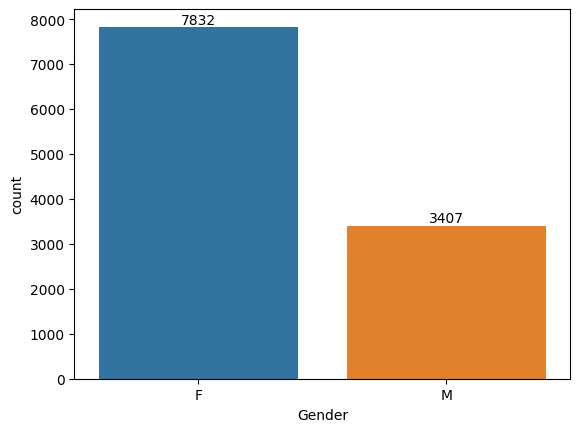

In [50]:
#Gender (comparison between male and female)

ax = sns.countplot(x = 'Gender', data = df )


for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Gender', ylabel='Amount'>

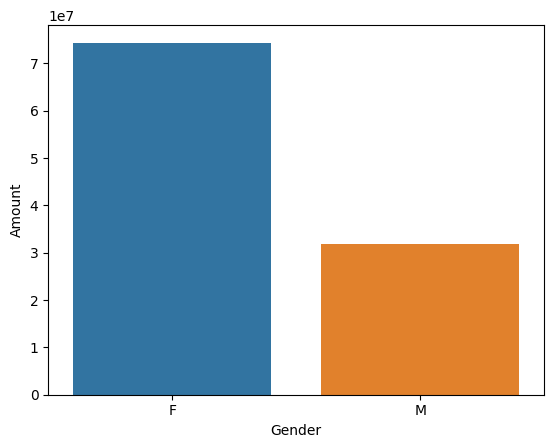

In [58]:
#sum of amount compared to gender

sales_gen = df.groupby(['Gender'], as_index = False )['Amount'].sum().sort_values(by = 'Amount', ascending = False)

sns.barplot(x = 'Gender', y = 'Amount' , data = sales_gen)


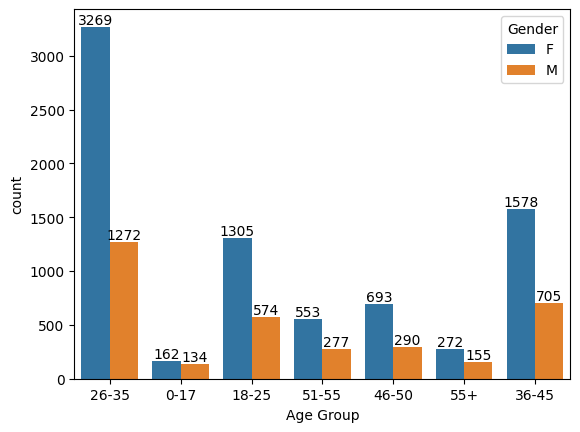

In [59]:
#Age Group basis

bx = sns.countplot(x = 'Age Group', data = df, hue = 'Gender' )


for bars in bx.containers:
    bx.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Amount'>

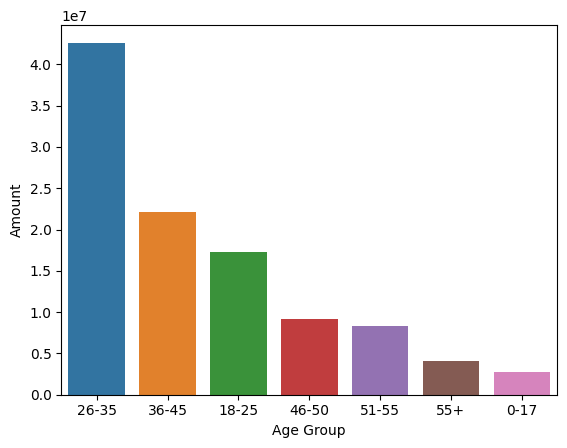

In [60]:
#sum of amount compared to Age Group

sales_Age = df.groupby(['Age Group'], as_index = False )['Amount'].sum().sort_values(by = 'Amount', ascending = False)

sns.barplot(x = 'Age Group', y = 'Amount' , data = sales_Age)

<Axes: xlabel='State', ylabel='Orders'>

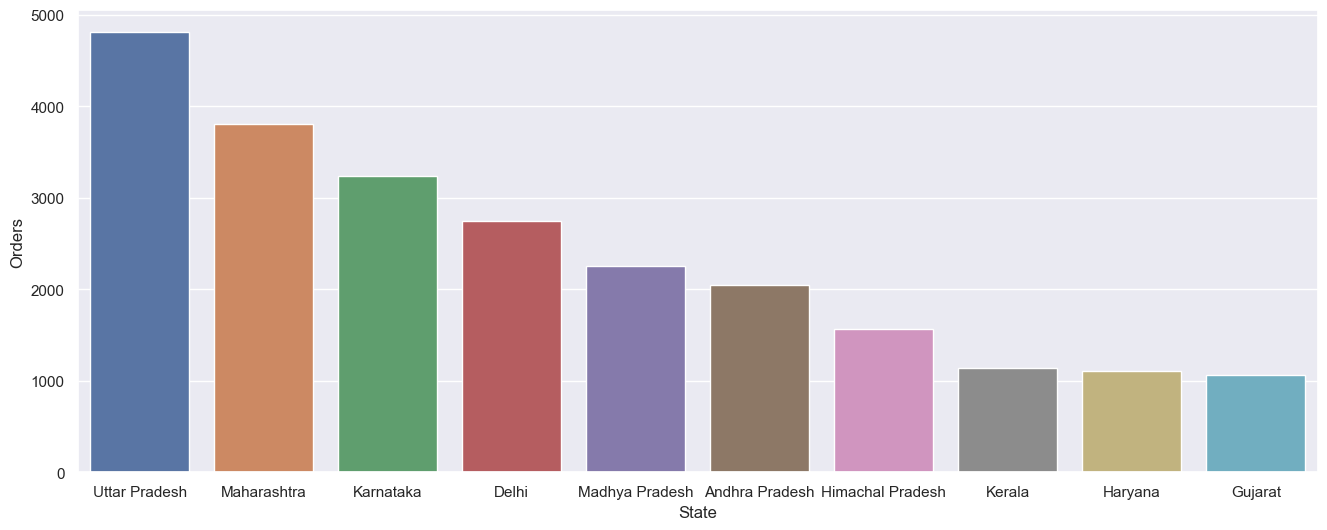

In [65]:
#Total number of sales from top 10 states

sales_state = df.groupby(['State'], as_index = False)['Orders'].sum().sort_values(by = 'Orders', ascending = False).head(10)

sns.set(rc={'figure.figsize' :(16,6)})
sns.barplot(x= 'State',y = 'Orders', data = sales_state )


<Axes: xlabel='State', ylabel='Amount'>

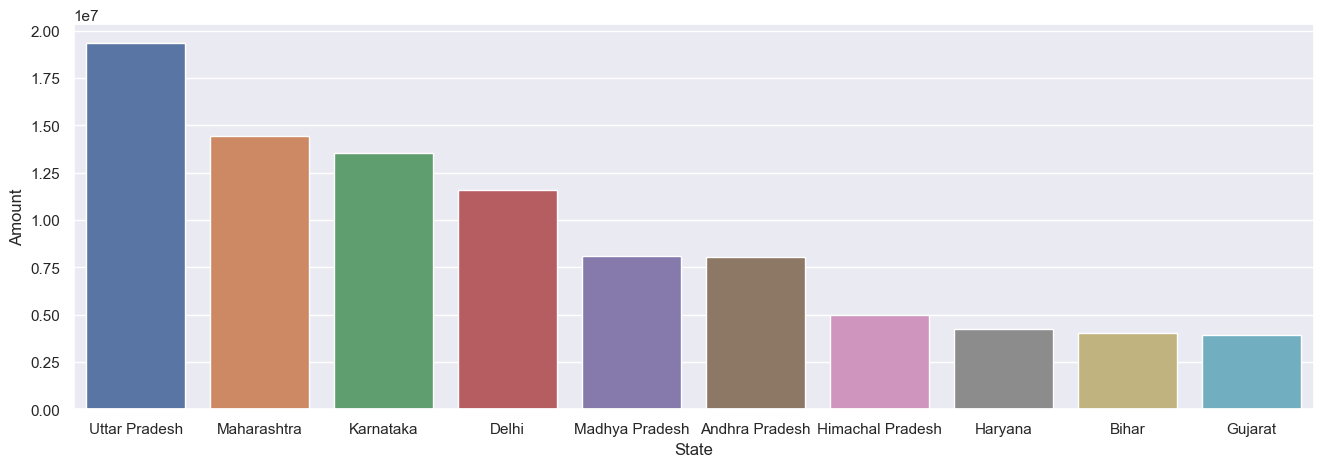

In [67]:
#Total amount/sale in top 10 states

sales_Age = df.groupby(['State'], as_index = False )['Amount'].sum().sort_values(by = 'Amount', ascending = False).head(10)


sns.set(rc={'figure.figsize' :(16,5)})
sns.barplot(x = 'State', y = 'Amount' , data = sales_Age)

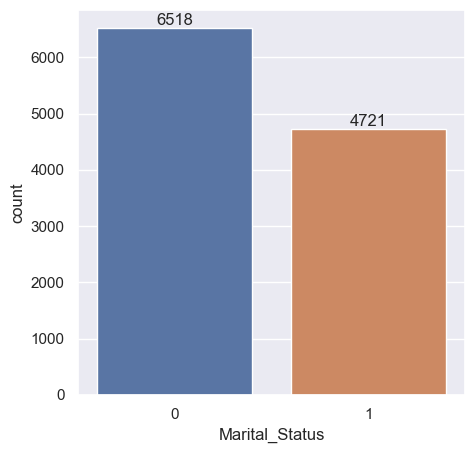

In [72]:
#Marrital status
m_S = sns.countplot(x = 'Marital_Status', data = df )

sns.set(rc={'figure.figsize' :(3,5)})
for bars in m_S.containers:
    m_S.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

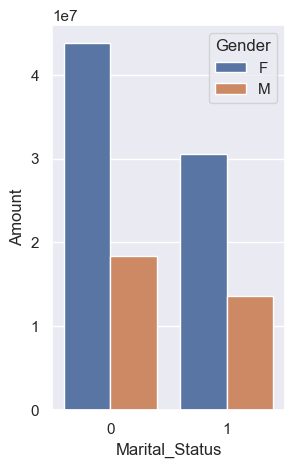

In [73]:
#sum of amount compared to Marital_Status

sales_married = df.groupby(['Marital_Status','Gender'], as_index = False )['Amount'].sum().sort_values(by = 'Amount', ascending = False)

sns.barplot(x = 'Marital_Status', y = 'Amount' , data = sales_married, hue = 'Gender')


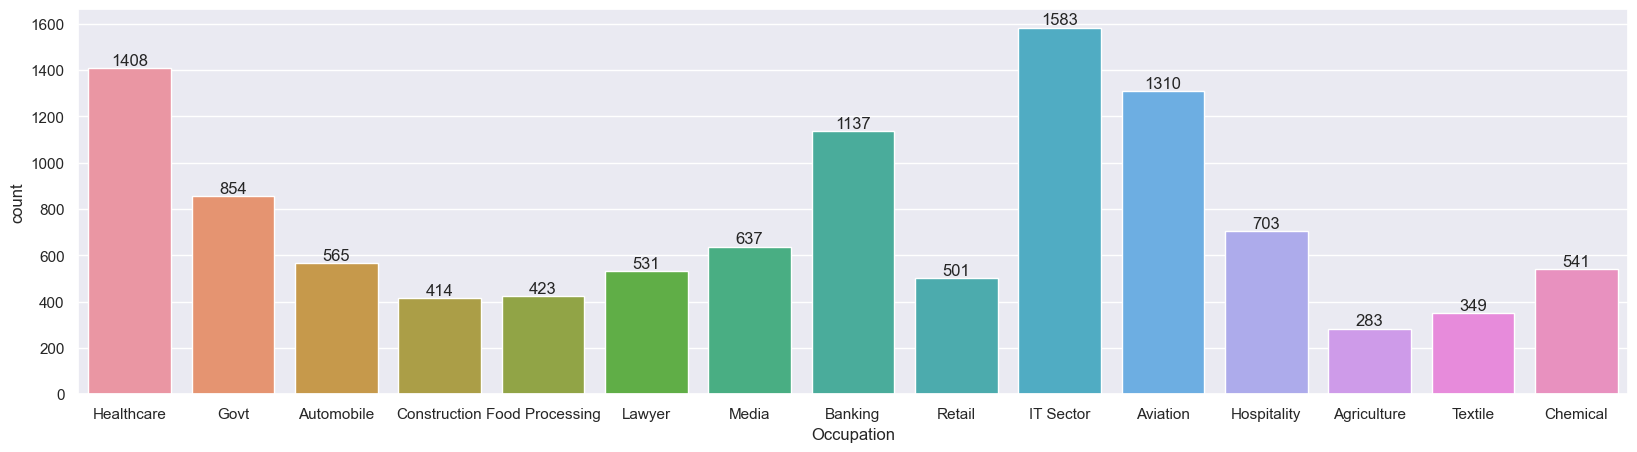

In [75]:
#based on Occupation


sns.set(rc={'figure.figsize' :(20,5)})
occ = sns.countplot(x = 'Occupation', data = df )

for bars in occ.containers:
    occ.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

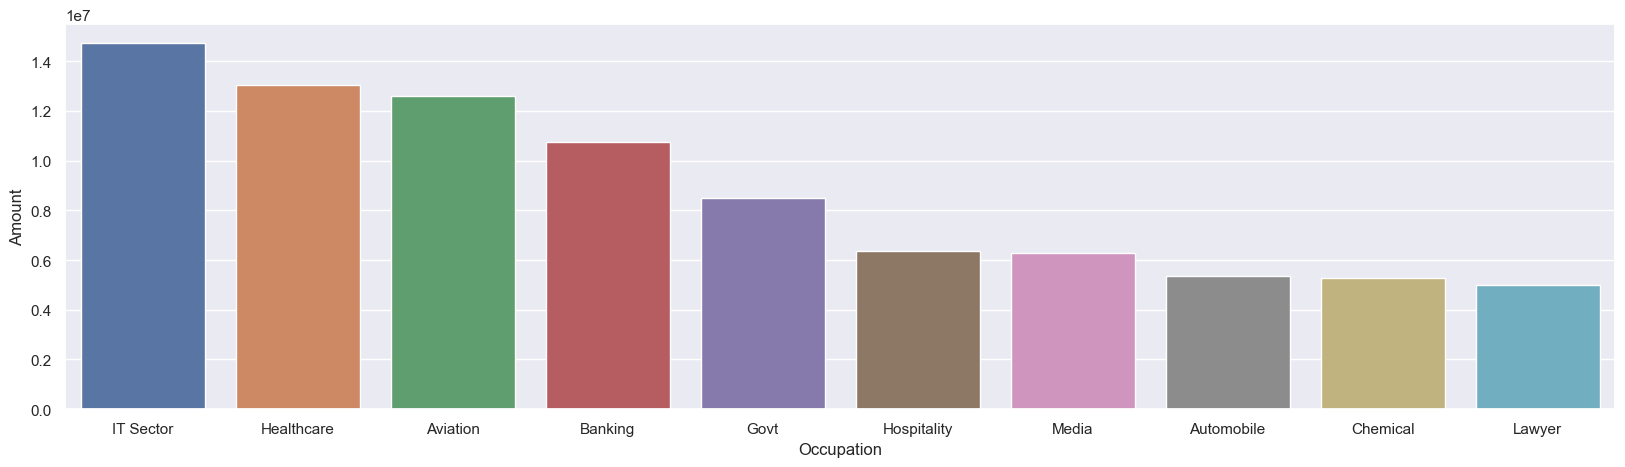

In [76]:
occupa = df.groupby(['Occupation'], as_index = False )['Amount'].sum().sort_values(by = 'Amount', ascending = False).head(10)


sns.set(rc={'figure.figsize' :(20,5)})
sns.barplot(x = 'Occupation', y = 'Amount' , data = occupa)

In [ ]:
                                               #Conclusion:
# Married women age group 26-35 yrs from UP, Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category